practical Statistic for Data Science
Chapter 1

In [1]:
import pandas as pd


In [2]:
medal_count = pd.read_excel('./dataset/Medals.xlsx')
medal_count

/home/anish/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [3]:
medal_count['Total'].mean()

11.612903225806452

In [4]:
import numpy as np
np.average(medal_count['Total'],weights=medal_count['Gold']) #weighted mean

46.832352941176474

In [5]:
#trimmed mean
from scipy.stats import trim_mean
trim_mean(medal_count['Total'],0.1) #exclude 10% of top

6.8933333333333335

In [6]:
#median
medal_count['Total'].median()

4.0

In [7]:
#weighted median
def weighted_median(df, median_col,weight_col):
    df_sorted =df.sort_values(median_col)   
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum>=cutoff][median_col].iloc[0]

weighted_median(medal_count,'Total','Gold')

40

In [8]:
#percentile
q3 = np.percentile(medal_count['Total'],75)
q3

11.0

##Estimates of Variability(Dispersion Metric)

In [9]:


#variance
from statistics import  variance
variance(medal_count['Gold'])

49.315100514259

In [10]:
#standard Deviation
import math
from statistics import stdev
stdev(medal_count['Gold']) #square root of variance is stdev

7.022471111671375

In [11]:
#mean absolute deviation
from numpy import mean, absolute
mean(absolute(medal_count['Gold']-mean(medal_count['Gold'])))

4.0048560527228565

In [12]:
#median Absolute Deviation
from numpy import median, absolute
median(absolute(medal_count['Gold']-median(medal_count['Gold'])))

1.0

In [13]:
#inter quartrile range
q3, q1 =np.percentile(medal_count['Gold'],[75,25])
iqr = q3-q1
iqr

3.0

#Exploring Data Distributions

<Axes: >

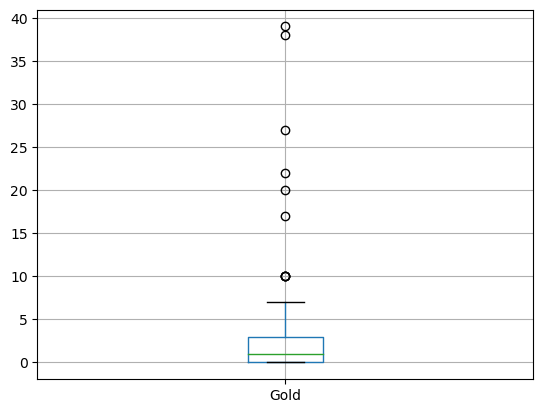

In [14]:
#Box plot
medal_count.boxplot(column='Gold',by=None,ax=None)

In [15]:
#frequency table
frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count["Gold"],10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


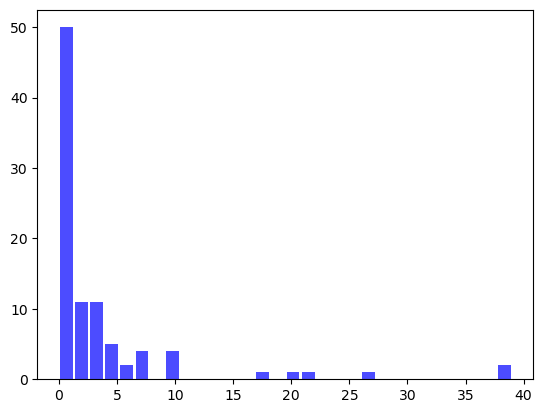

In [16]:
#histogram
import matplotlib.pyplot as plt
plt.hist(x=medal_count["Gold"],bins='auto',color='blue',alpha=0.7,rwidth=0.85)
plt.show()

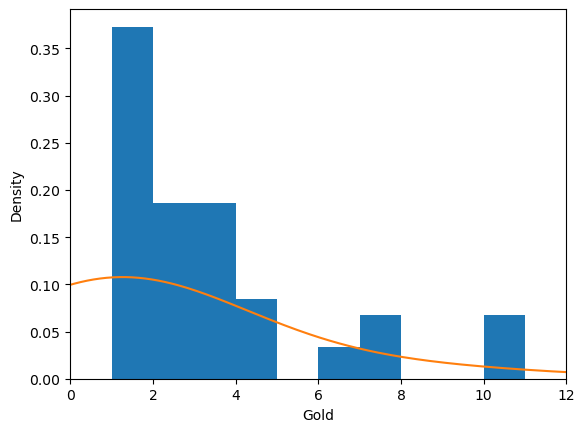

In [17]:
#density plot
ax = medal_count["Gold"].plot.hist(density = True,xlim=[0,12],bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel('Gold')
plt.show()

#Exploring binary and Categorical Data

In [18]:
#mode
medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

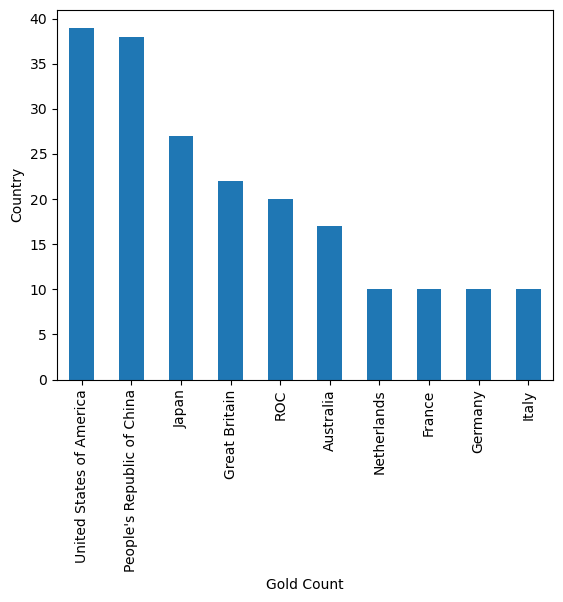

In [24]:
#barchart
ax = medal_count.iloc[:10,:].plot.bar(x='Team/NOC',y="Gold",legend = False)
ax.set_xlabel("Gold Count")
ax.set_ylabel('Country')
plt.show()

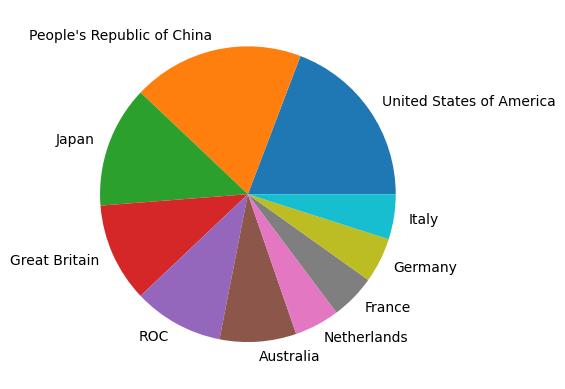

In [30]:
#pie  Chart
pie_data = medal_count.iloc[:10,:]
plt.pie(pie_data['Gold'],labels=pie_data['Team/NOC'])
plt.show()

In [31]:
##correlation
medal_count.corr()

/tmp/ipykernel_5395/1458443235.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medal_count.corr()


,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


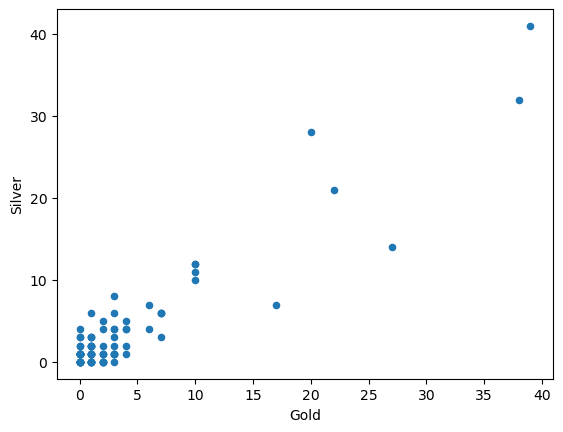

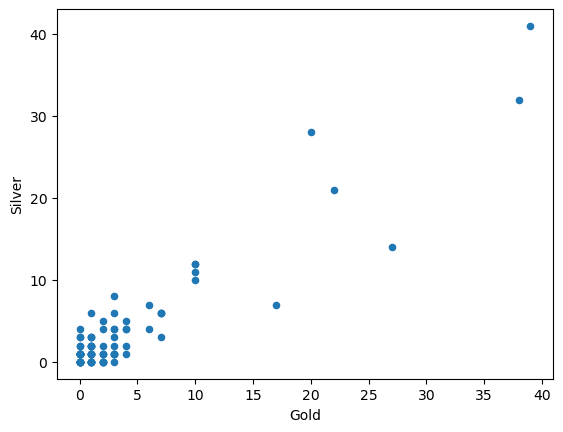

In [33]:
#scatterplot
medal_count.plot.scatter(x="Gold",y='Silver')
plt.show()

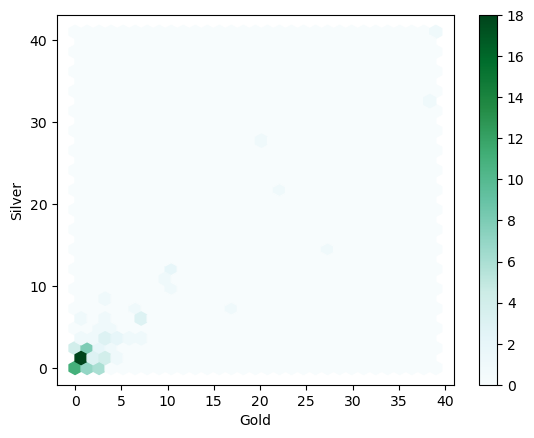

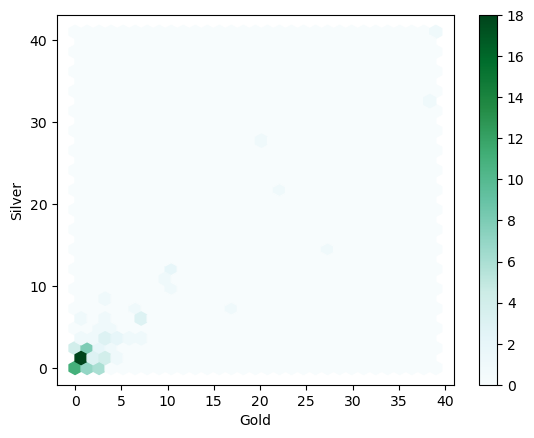

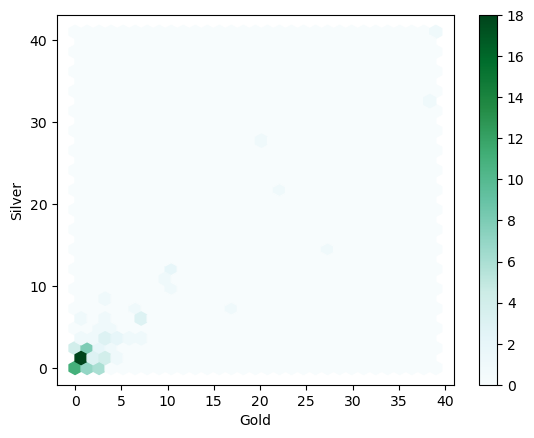

In [40]:
#hexagonal binning
medal_count.plot.hexbin(x="Gold",y="Silver",gridsize=30 , sharex =False)
plt.show()

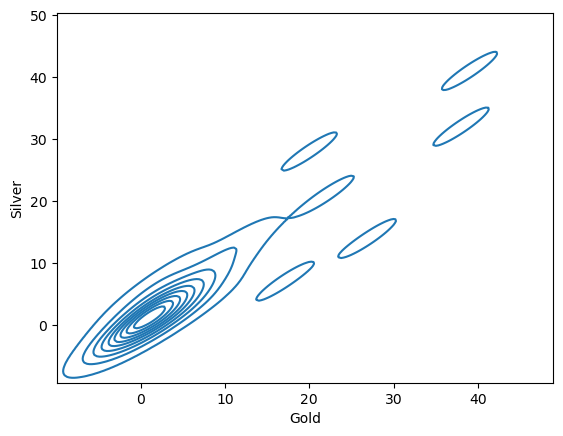

In [56]:
##contour plot
import seaborn as sns
ax = sns.kdeplot(data=medal_count,x=medal_count['Gold'],y=medal_count['Silver'])
plt.show()

/tmp/ipykernel_5395/2628383399.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medal_count.corr())


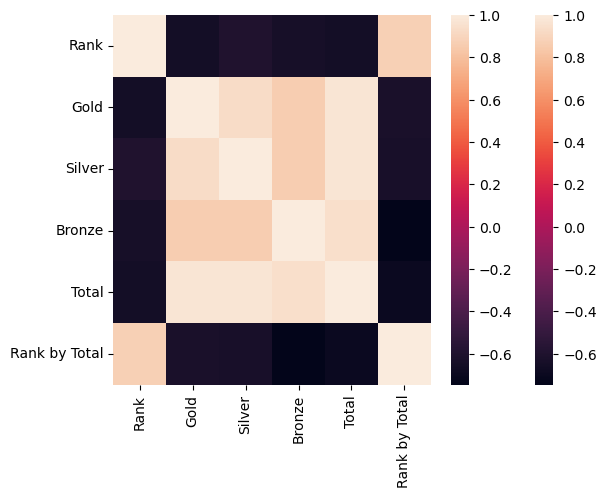

In [58]:
#heatmap
sns.heatmap(medal_count.corr())
plt.show()

In [66]:
#contingency Table
crossTab = medal_count[['Silver', 'Gold']].pivot_table(index='Silver',columns='Gold',aggfunc=lambda x: len(x),margins=True)
crossTab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


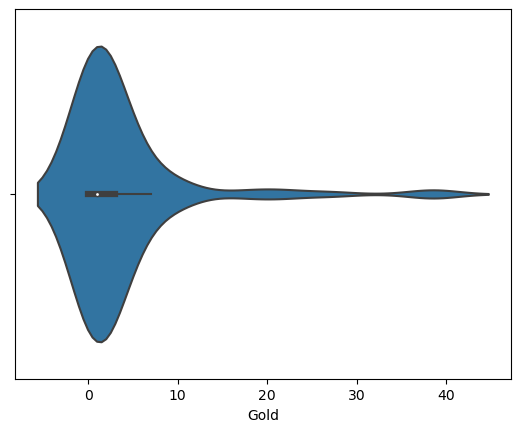

In [69]:
sns.violinplot(x =medal_count['Gold'])
plt.show()